In [13]:
import networkx as nx

In [28]:
def create_graph(sink_name:str,count_want:int,ware_houses_list:dict[str,dict[str,float]],
                                                            #Nombre empresa, "capacity":9, "weight": 0
                 manufacturer_list:list[tuple]):
    """
    Cada lista recibe tuplas con 
    nombre de la empresa o su id
    cant maxima abastecer y precio por  unidad sumado con el del transportista
    :param sink_name: 
    :param count_want: 
    :param ware_houses_list: 
    :param manufacturer_list: 
    :return: 
    """

    fake_sink='sink'
    source='source'
    
    G = nx.DiGraph()
    lis=[(fake_sink,sink_name,{"capacity": count_want,"weight": 0})]
    
    
    #G.add_edges_from(
    #    [
    #        (fuente,prove_1, {"capacity":9, "weight": 0}),
    #        (fuente,prove_2, {"capacity": 9, "weight": 0}),
    #        (prove_1,fake_sink, {"capacity": 80, "weight": 80}),
    #        (prove_2,fake_sink,{"capacity": 4, "weight": 10.1}),
    #        (fake_sink,
    #         Tienda_1,{"capacity": 9,"weight": 9}),
    #        
    #    ]
    #)
    
    for ware_house_name in ware_houses_list.keys():
        #Devuelve el diccionario de cada almacen de esta forma
        #{"capacity":cant maxima a sumnistrar,"weight": 0})
        ware_house_condiction=ware_houses_list[ware_house_name]
        #Añade la arista que tiene el precio y la cant maxima a suministrar desde un alamcen a la fuente falsa
        
        lis.append((ware_house_name,fake_sink,ware_house_condiction))
        
        #Añade la arista desde la fuenta hasta cada almacen
        lis.append((source,ware_house_name,{"capacity": count_want,"weight": 0}))
        
    
    G.add_edges_from(lis)
    
    return G
        



dic_company={'Almacen_1':{"capacity": 9,"weight": 9},'Almacen_2':{"capacity": 10,"weight": 90}}
G=create_graph('Tienda_1',1,dic_company,[])
print(G)
Tienda_1='Tienda_1'
fake_sink='sink'
source='source'

mincostFlow = nx.max_flow_min_cost(G, source, Tienda_1)
mincost = nx.cost_of_flow(G, mincostFlow)

print(mincostFlow)


DiGraph with 5 nodes and 5 edges
{'sink': {'Tienda_1': 1}, 'Tienda_1': {}, 'Almacen_1': {'sink': 1}, 'source': {'Almacen_1': 1, 'Almacen_2': 0}, 'Almacen_2': {'sink': 0}}


In [26]:
for company_id in dic_company.keys():
    
    source_dic=mincostFlow['source']
    
    val=source_dic[company_id]
    
    
    print(company_id,val)

Almacen_1 1
Almacen_2 0


In [27]:
print(mincost)

9


In [1]:
import networkx as nx
G = nx.DiGraph()
fuente='Fuente'
prove_1='Provedor_1'
prove_2='Provedor_2'
fake_sink='Fake_sink'
Tienda_1='Tienda_1'
G.add_edges_from(
    [
        (fuente,prove_1, {"capacity":9, "weight": 0}),
        (fuente,prove_2, {"capacity": 9, "weight": 0}),
        (prove_1,fake_sink, {"capacity": 80, "weight": 80}),
        (prove_2,fake_sink,{"capacity": 4, "weight": 10.1}),
        (fake_sink,
         Tienda_1,{"capacity": 9,"weight": 9}),
        
    ]
)
mincostFlow = nx.max_flow_min_cost(G, fuente, Tienda_1)
mincost = nx.cost_of_flow(G, mincostFlow)


In [2]:
mincostFlow

{'Fuente': {'Provedor_1': 5, 'Provedor_2': 4},
 'Provedor_1': {'Fake_sink': 5},
 'Provedor_2': {'Fake_sink': 4},
 'Fake_sink': {'Tienda_1': 9},
 'Tienda_1': {}}

In [3]:
import networkx as nx

def create_graph_from_dict(graph_dict):
    G = nx.DiGraph()
    for node, edges in graph_dict.items():
        for neighbor, attributes in edges.items():
            G.add_edge(node, neighbor, **attributes)
    return G

# Uso de la función
graph_dict = {
    'Fuente': {
        'Provedor_1': {"capacity":9, "weight": 0},
        'Provedor_2': {"capacity": 9, "weight": 0},
        'Provedor_3':{"capacity": 9, "weight": 0}
    },
    'Provedor_1': {
        'Fake_sink': {"capacity": 80, "weight": 80}
    },
    'Provedor_2': {
        'Fake_sink': {"capacity": 4, "weight": 10}
    },
    'Provedor_3':{'Fake_sink': {"capacity": 4000, "weight": 10000}},
    'Fake_sink': {
        'Tienda_1': {"capacity": 9, "weight": 9}
    }
}

G = create_graph_from_dict(graph_dict)

In [4]:
print(G)

DiGraph with 6 nodes and 7 edges


In [5]:
mincostFlow = nx.max_flow_min_cost(G, fuente, Tienda_1)
mincost = nx.cost_of_flow(G, mincostFlow)

In [17]:
mincostFlow

{'Fuente': {'Provedor_1': 5, 'Provedor_2': 4, 'Provedor_3': 0},
 'Provedor_1': {'Fake_sink': 5},
 'Provedor_2': {'Fake_sink': 4},
 'Provedor_3': {'Fake_sink': 0},
 'Fake_sink': {'Tienda_1': 9},
 'Tienda_1': {}}

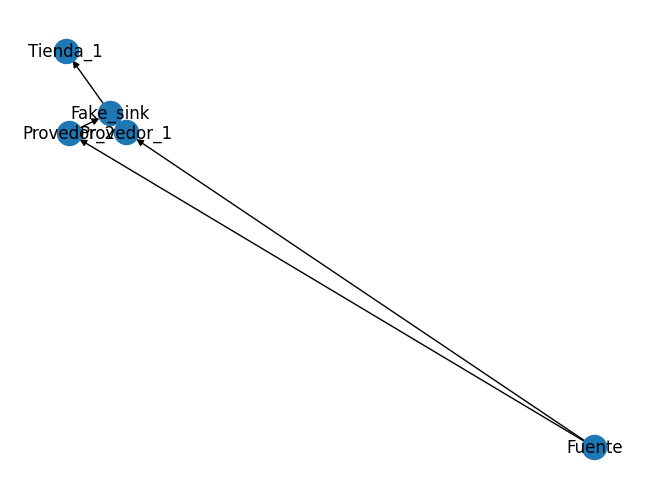

In [5]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.show()

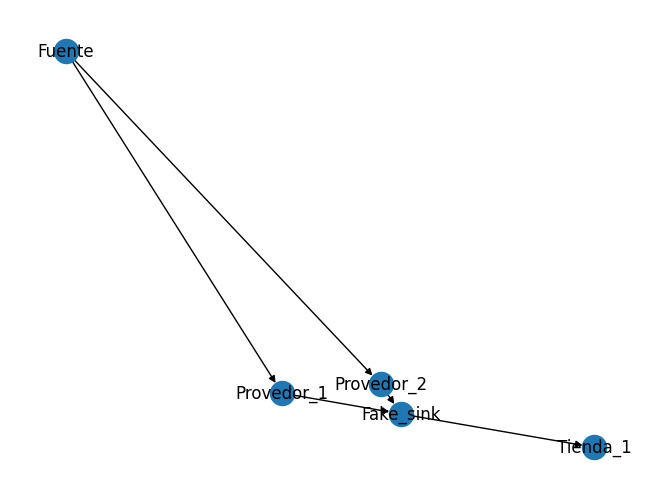

In [6]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  # Posicionamiento de los nodos usando el algoritmo de fuerza
nx.draw(G, pos, with_labels=True)
plt.show()

In [7]:
mincostFlow = nx.max_flow_min_cost(G, fuente, Tienda_1)
mincost = nx.cost_of_flow(G, mincostFlow)


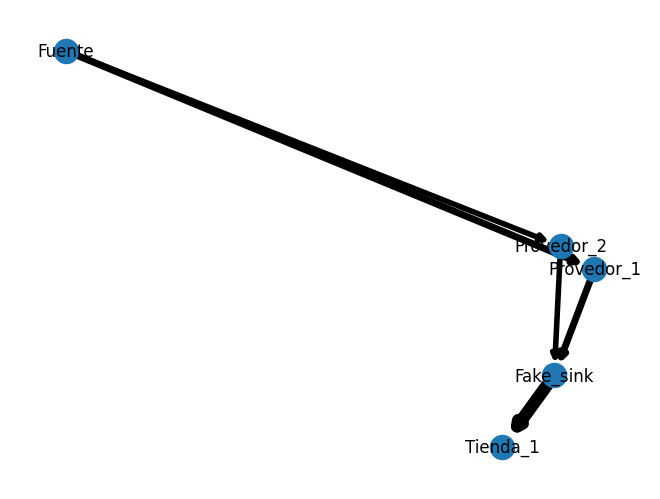

In [9]:
# Actualizar los atributos de las aristas en el grafo original
for u, v, data in G.edges(data=True):
    data['flow'] = mincostFlow[u][v]

# Crear una lista de los flujos para usar en la visualización
flows = [data['flow'] for u, v, data in G.edges(data=True)]

# Dibujar el grafo con el grosor de las líneas proporcional al flujo
pos = nx.spring_layout(G)  # Posicionamiento de los nodos usando el algoritmo de fuerza
nx.draw(G, pos, with_labels=True, width=flows)
plt.show()

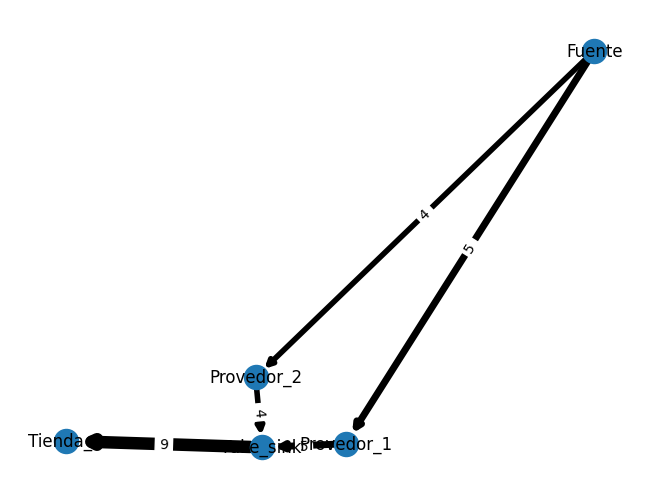

In [10]:
import matplotlib.pyplot as plt

# Actualizar los atributos de las aristas en el grafo original
for u, v, data in G.edges(data=True):
    data['flow'] = mincostFlow[u][v]

# Crear una lista de los flujos para usar en la visualización
flows = [data['flow'] for u, v, data in G.edges(data=True)]

# Dibujar el grafo con el grosor de las líneas proporcional al flujo
pos = nx.spring_layout(G)  # Posicionamiento de los nodos usando el algoritmo de fuerza
nx.draw(G, pos, with_labels=True, width=flows)

# Dibujar las etiquetas de las aristas
edge_labels = nx.get_edge_attributes(G, 'flow')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

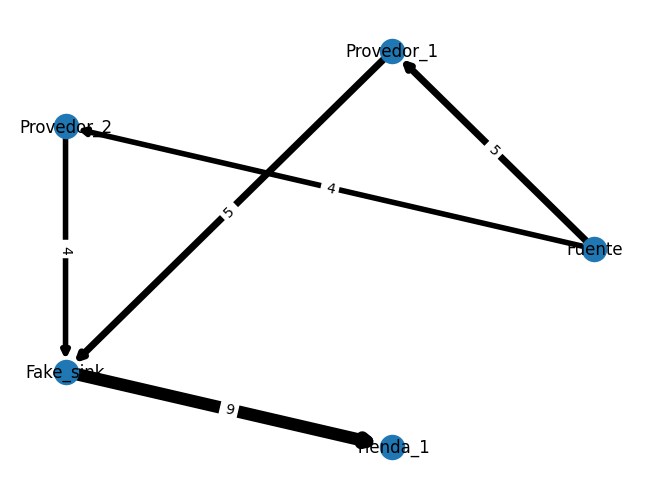

In [11]:
import matplotlib.pyplot as plt

# Actualizar los atributos de las aristas en el grafo original
for u, v, data in G.edges(data=True):
    data['flow'] = mincostFlow[u][v]

# Crear una lista de los flujos para usar en la visualización
flows = [data['flow'] for u, v, data in G.edges(data=True)]

# Dibujar el grafo con el grosor de las líneas proporcional al flujo
pos = nx.circular_layout(G)  # Posicionamiento de los nodos en un círculo
nx.draw(G, pos, with_labels=True, width=flows)

# Dibujar las etiquetas de las aristas
edge_labels = nx.get_edge_attributes(G, 'flow')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

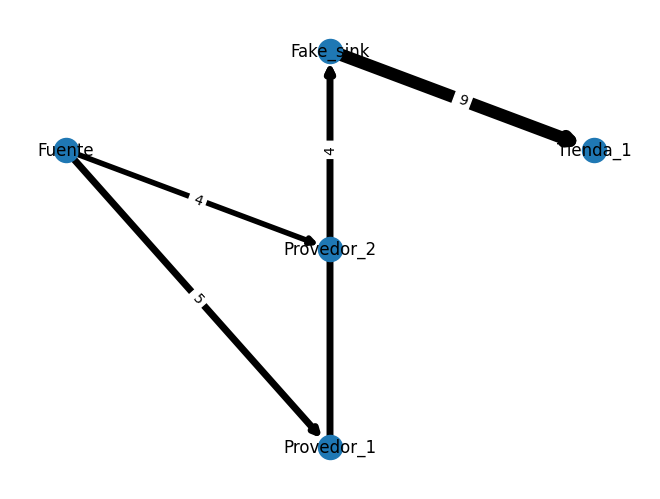

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def custom_layout(G):
    pos = {}
    left = [node for node in G.nodes() if G.in_degree(node)==0]
    right = [node for node in G.nodes() if G.out_degree(node)==0]
    middle = [node for node in G.nodes() if node not in left+right]

    for node in left:
        pos[node] = np.array([0, 0.5])

    for i, node in enumerate(middle):
        pos[node] = np.array([0.5, i / len(middle)])

    for node in right:
        pos[node] = np.array([1, 0.5])

    return pos

# Actualizar los atributos de las aristas en el grafo original
for u, v, data in G.edges(data=True):
    data['flow'] = mincostFlow[u][v]

# Crear una lista de los flujos para usar en la visualización
flows = [data['flow'] for u, v, data in G.edges(data=True)]

# Dibujar el grafo con el grosor de las líneas proporcional al flujo
pos = custom_layout(G)  # Posicionamiento de los nodos usando el layout personalizado
nx.draw(G, pos, with_labels=True, width=flows)

# Dibujar las etiquetas de las aristas
edge_labels = nx.get_edge_attributes(G, 'flow')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

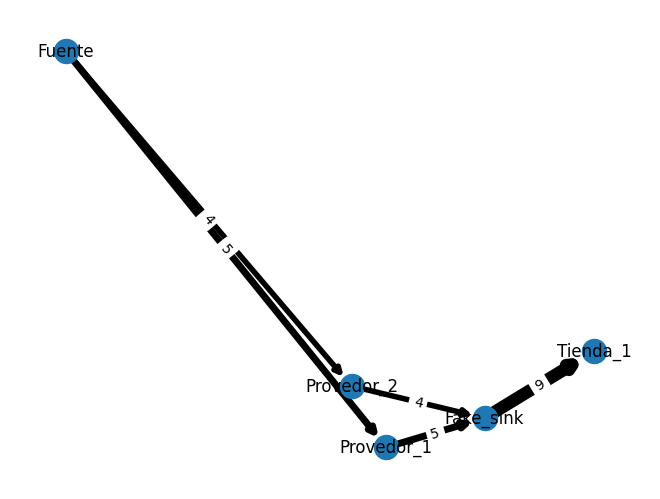

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def custom_layout(G):
    pos = {}
    left = [node for node in G.nodes() if G.in_degree(node)==0]
    right = [node for node in G.nodes() if G.out_degree(node)==0]
    middle = [node for node in G.nodes() if node not in left+right]

    for node in left:
        pos[node] = np.array([0, 0.5])

    for i, node in enumerate(middle):
        pos[node] = np.array([0.5, i / len(middle)])

    for node in right:
        pos[node] = np.array([1, 0.5])

    return pos

# Actualizar los atributos de las aristas en el grafo original
for u, v, data in G.edges(data=True):
    data['flow'] = mincostFlow[u][v]

# Crear una lista de los flujos para usar en la visualización
flows = [data['flow'] for u, v, data in G.edges(data=True)]

# Dibujar el grafo con el grosor de las líneas proporcional al flujo
pos = nx.fruchterman_reingold_layout(G)  # Posicionamiento de los nodos usando el algoritmo de Fruchterman-Reingold
nx.draw(G, pos, with_labels=True, width=flows)

# Dibujar las etiquetas de las aristas
edge_labels = nx.get_edge_attributes(G, 'flow')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()